#Tugas

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_iris, y_true_iris = load_iris(return_X_y=True)

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

pca = PCA(n_components=2)
X_iris_2d = pca.fit_transform(X_iris_scaled)

print(f"Bentuk data asli: {X_iris_scaled.shape}")
print(f"Bentuk data setelah PCA: {X_iris_2d.shape}")

Bentuk data asli: (150, 4)
Bentuk data setelah PCA: (150, 2)


In [ ]:
hdb_iris = hdbscan.HDBSCAN(min_cluster_size=10)

labels_hdb_iris = hdb_iris.fit_predict(X_iris_scaled)

prob_hdb_iris = hdb_iris.probabilities_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import numpy as np

unique_labels_iris = set(labels_hdb_iris)
n_clusters_iris = len(unique_labels_iris) - (1 if -1 in unique_labels_iris else 0)

n_noise_iris = list(labels_hdb_iris).count(-1)

print("--- Laporan Hasil HDBSCAN ---")
print(f"Dataset: Iris")
print(f"Parameter: min_cluster_size=10")
print(f"Jumlah cluster yang terbentuk: {n_clusters_iris}")
print(f"Banyaknya noise (titik data): {n_noise_iris}")

--- Laporan Hasil HDBSCAN ---
Dataset: Iris
Parameter: min_cluster_size=10
Jumlah cluster yang terbentuk: 2
Banyaknya noise (titik data): 2


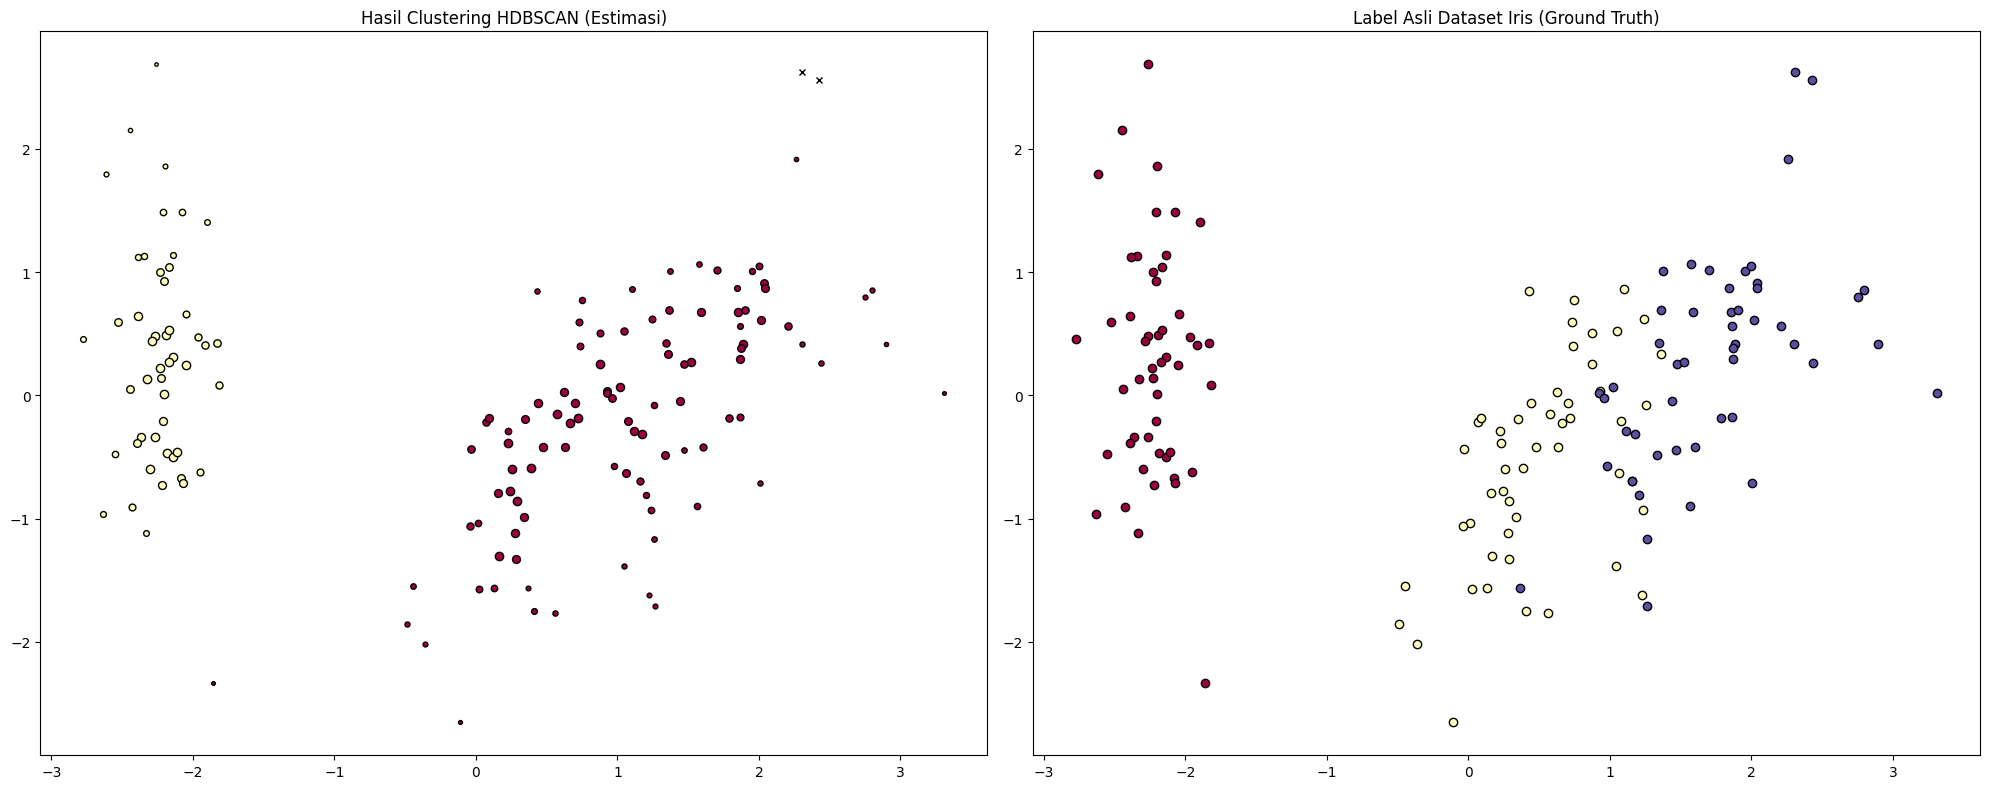

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

plot(
    X_iris_2d,
    labels=labels_hdb_iris,
    probabilities=prob_hdb_iris,
    parameters={"model": "HDBSCAN", "min_cluster_size": 10},
    ax=axes[0]
)
axes[0].set_title("Hasil Clustering HDBSCAN (Estimasi)")

plot(
    X_iris_2d,
    labels=y_true_iris,
    ground_truth=True,
    ax=axes[1]
)
axes[1].set_title("Label Asli Dataset Iris (Ground Truth)")

plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score

ari_score = adjusted_rand_score(y_true_iris, labels_hdb_iris)
hom_score = homogeneity_score(y_true_iris, labels_hdb_iris)
com_score = completeness_score(y_true_iris, labels_hdb_iris)

print(f"Adjusted Rand Index (ARI): {ari_score:.3f}")
print(f"Homogeneity: {hom_score:.3f}")
print(f"Completeness: {com_score:.3f}")

Adjusted Rand Index (ARI): 0.539
Homogeneity: 0.554
Completeness: 0.873


###Analisis
Jumlah cluster yang terbentuk: 2
Banyaknya noise: 2
Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
Ringkasan: HDBSCAN bekerja untuk menemukan cluster yang padat dan terpisah, tetapi sesuai dengan sifatnya yang ebrbasis kepadatan yang membuat kesulitan dalam memisahkan 2 cluster yang saling tumpang tindih dan memiliki kepadatan lebih rendah, sehingga menggabungkannya menjadi 1